In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
path_to_image = "rabbit.jpg"  # Ảnh chính
path_to_template = "rabbit_eye.jpg"  # Ảnh mẫu 

In [47]:
image = cv2.imread(path_to_image)
template = cv2.imread(path_to_template)

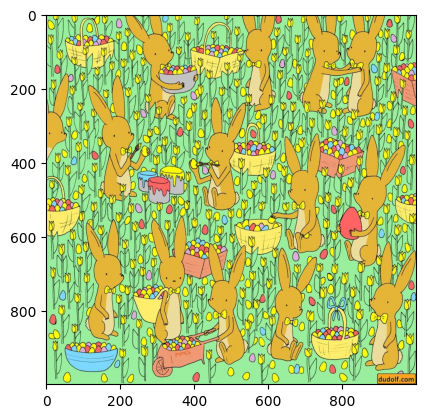

In [48]:
plt.imshow(image[:,:,::-1])
plt.show()

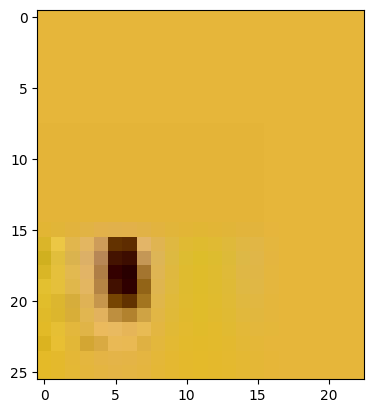

In [49]:
plt.imshow(template[:,:,::-1])
plt.show()

In [50]:
# Chuyển ảnh sang ảnh xám và làm mịn
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

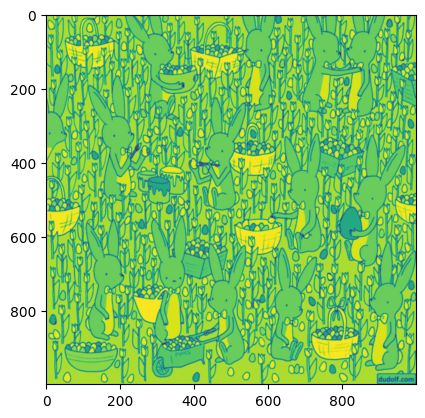

In [51]:
plt.imshow(gray_image)
plt.show()

In [52]:
# Áp dụng Template Matching
result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)
# Sử dụng ngưỡng nhận diện là 0.7
threshold = 0.7
# Tìm vị trí của các điểm có độ tương đồng lớn hơn ngưỡng
locations = np.where(result >= threshold)
rectangles = []

In [53]:
# Tìm kích thước của mẫu để khoanh vùng và lưu nếu tìm được
h, w = gray_template.shape
# Danh sách chứa bounding box (hộp giới hạn)
boxes = []
for pt in zip(*locations[::-1]):
    x, y = pt
    boxes.append([x, y, x + w, y + h])  # Lưu dạng [x1, y1, x2, y2]
# **Hàm kiểm tra xem hai hộp có gần nhau không (Dùng khoảng cách Euclidean)**
def is_close(box1, box2, distance_threshold=20):
    x1, y1, x2, y2 = box1
    x1_, y1_, x2_, y2_ = box2

    # Tính khoảng cách giữa hai tâm hộp
    center1 = ((x1 + x2) / 2, (y1 + y2) / 2)
    center2 = ((x1_ + x2_) / 2, (y1_ + y2_) / 2)

    dist = np.sqrt((center1[0] - center2[0])**2 + (center1[1] - center2[1])**2)
    return dist < distance_threshold

# **Gộp các hộp bị chồng bằng cách nhóm hộp gần nhau**
merged_boxes = []
while boxes:
    box = boxes.pop(0)
    group = [box]

    for other_box in boxes[:]:  
        if is_close(box, other_box):
            group.append(other_box)
            boxes.remove(other_box)

    # Xác định hộp bao phủ tất cả hộp trong nhóm
    x1_min = min(b[0] for b in group)
    y1_min = min(b[1] for b in group)
    x2_max = max(b[2] for b in group)
    y2_max = max(b[3] for b in group)
    
    merged_boxes.append([x1_min, y1_min, x2_max, y2_max])

# Vẽ kết quả lên ảnh
for (x1, y1, x2, y2) in merged_boxes:
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

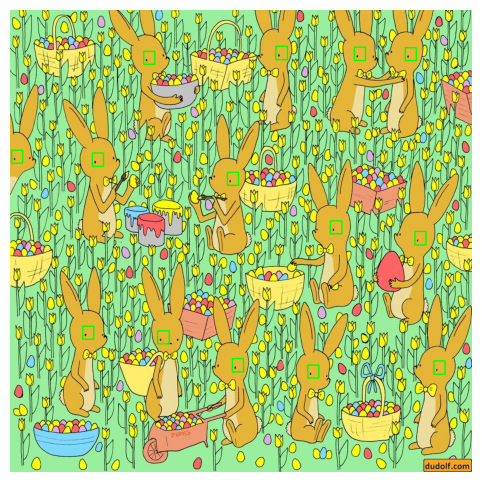

In [54]:
# Hiển thị kết quả
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Số ô vuông được khoanh vào: 14


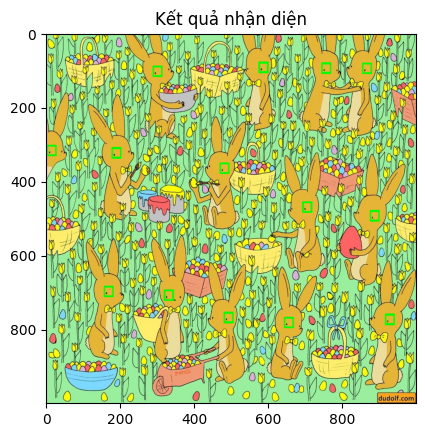

In [55]:
# ...existing code...

# Đếm số lượng ô vuông và vẽ hình chữ nhật
for loc in zip(*locations[::-1]):  # Đảo ngược tọa độ để lấy (x, y)
    rectangles.append((loc[0], loc[1], gray_template.shape[1], gray_template.shape[0]))
    cv2.rectangle(image, loc, (loc[0] + gray_template.shape[1], loc[1] + gray_template.shape[0]), (0, 255, 0), 2)

# Loại bỏ các hình chữ nhật bị trùng lặp
rectangles, _ = cv2.groupRectangles(rectangles, groupThreshold=1, eps=0.5)

# Đếm số lượng ô vuông
num_squares = len(rectangles)
print(f"Số ô vuông được khoanh vào: {num_squares}")

# Hiển thị hình ảnh với các ô vuông được khoanh
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Kết quả nhận diện")
plt.show()